In [1]:
# Dependencies
     #Cursor_VaderTweets_Bonus_Solved
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn as sb
import time
import datetime
import matplotlib.pyplot as plt
from datetime import datetime,tzinfo,timedelta

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys (please use your keys)
consumer_key = "QIM4gJxr4fVVl2A4JLgLGz96z"
consumer_secret = "Efibh7sTLjEEX923BlldlYDvHuRoZeqZc3VIywQWdeyEYDAaIn"
access_token = "1564778598-SjtjLbJm65j8H5jKq6GFDkhxH39XOFaAWSJDyO4"
access_token_secret = "ySlASOpfaQw3wMS7ri4PKGnTRiAfYUCjqhhCR8xBoXsja"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
target_user = ("@Boeing", "@Airbus")

# Variables for holding sentiments

compound_list = []
positive_list = []
negative_list = []
neutral_list = []

#Other variables for dataframe
user_list = []
converted_timestamps = []
tweet_time_ago = []
tweet_text = []

In [4]:
# Loop through each user
for user in target_user:
    counter = 0
       
    # Loop through 10 pages of tweets (total 100 tweets)
    for page in tweepy.Cursor(api.user_timeline, id=user).items():

        # Get all tweets from home feed
        #public_tweets = api.user_timeline(user)
#         page = page[0]
        tweet = json.dumps(page._json, indent=3)
        tweet = json.loads(tweet)
        text = tweet['text']
        raw_time = tweet['created_at']
        
        converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
        date_stamp = converted_time.strftime("%m-%d-%Y")
        converted_time = converted_time.strftime("%m-%d-%Y %H:%M:%S") 
        
#         # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]

        # Add each value to the appropriate array
        user_list.append(user)
        compound_list.append(compound)
        positive_list.append(pos)
        neutral_list.append(neu)
        negative_list.append(neg)
        
        converted_timestamps.append(converted_time)
        tweet_time_ago.append(counter)
        tweet_text.append(text)
              
        counter = counter + 1
        
#         if counter % 59 == 0:
#             time.sleep(60)
        if counter % 100 == 0:  # first request completed, sleep 5 sec
            time.sleep(5)

In [5]:
twitter_data = {"User" : user_list,
                "Compound" : compound_list,
                "Positive" : positive_list,
                "Neutral" : neutral_list,
                "Negative" : negative_list,
                "Tweet" : tweet_text,
                "Time Stamp" : converted_timestamps,
                "Tweet_Ago" : tweet_time_ago,
               }

twitter_data = pd.DataFrame(twitter_data)

twitter_data.head(10000)

,User,Compound,Positive,Neutral,Negative,Tweet,Time Stamp,Tweet_Ago
0,@Boeing,0.0000,0.000,1.000,0.000,RT @BoeingAirplanes: We hosted more than 200 a...,03-27-2019 19:09:45,0
1,@Boeing,0.8750,0.333,0.667,0.000,RT @BoeingCEO: Our Boeing team is proud to sta...,03-26-2019 18:19:14,1
2,@Boeing,0.0000,0.000,1.000,0.000,We will fully cooperate in the Department of T...,03-19-2019 20:35:09,2
3,@Boeing,0.8519,0.307,0.693,0.000,"RT @BoeingCEO: Lives depend on the work we do,...",03-19-2019 00:23:11,3
4,@Boeing,0.0000,0.000,1.000,0.000,"Boeing Chairman, President and CEO Dennis Muil...",03-17-2019 20:24:07,4
5,@Boeing,0.3612,0.122,0.878,0.000,"In Consultation with the FAA, NTSB and its Cus...",03-13-2019 18:56:02,5
6,@Boeing,0.0000,0.000,1.000,0.000,Boeing Statement on 737 MAX Operation: https:/...,03-12-2019 15:36:29,6
7,@Boeing,0.0000,0.000,1.000,0.000,RT @BoeingAirplanes: Updated Statement on Ethi...,03-10-2019 15:33:09,7
8,@Boeing,0.4019,0.137,0.863,0.000,We’re partnering with @FIRSTweets to support g...,03-08-2019 22:41:18,8
9,@Boeing,0.7650,0.320,0.680,0.000,"On this #InternationalWomensDay, we celebrate ...",03-07-2019 22:00:19,9


In [35]:
list(twitter_data)

['User',
 'Compound',
 'Positive',
 'Neutral',
 'Negative',
 'Tweet',
 'Time Stamp',
 'Tweet_Ago']

In [6]:
 twitter_data.to_csv('twitter.csv')

In [20]:
BoeingTweets = twitter_data.loc[twitter_data["User"] == "@Boeing"]
BoeingTweets.head(150)


,User,Compound,Positive,Neutral,Negative,Tweet,Time Stamp,Tweet_Ago
0,@Boeing,0.0000,0.000,1.000,0.000,RT @BoeingAirplanes: We hosted more than 200 a...,03-27-2019 19:09:45,0
1,@Boeing,0.8750,0.333,0.667,0.000,RT @BoeingCEO: Our Boeing team is proud to sta...,03-26-2019 18:19:14,1
2,@Boeing,0.0000,0.000,1.000,0.000,We will fully cooperate in the Department of T...,03-19-2019 20:35:09,2
3,@Boeing,0.8519,0.307,0.693,0.000,"RT @BoeingCEO: Lives depend on the work we do,...",03-19-2019 00:23:11,3
4,@Boeing,0.0000,0.000,1.000,0.000,"Boeing Chairman, President and CEO Dennis Muil...",03-17-2019 20:24:07,4
5,@Boeing,0.3612,0.122,0.878,0.000,"In Consultation with the FAA, NTSB and its Cus...",03-13-2019 18:56:02,5
6,@Boeing,0.0000,0.000,1.000,0.000,Boeing Statement on 737 MAX Operation: https:/...,03-12-2019 15:36:29,6
7,@Boeing,0.0000,0.000,1.000,0.000,RT @BoeingAirplanes: Updated Statement on Ethi...,03-10-2019 15:33:09,7
8,@Boeing,0.4019,0.137,0.863,0.000,We’re partnering with @FIRSTweets to support g...,03-08-2019 22:41:18,8
9,@Boeing,0.7650,0.320,0.680,0.000,"On this #InternationalWomensDay, we celebrate ...",03-07-2019 22:00:19,9


In [8]:
BoeingTweets.to_csv('boeing.csv')

In [10]:
AB_Tweets.to_csv('airbus.csv')

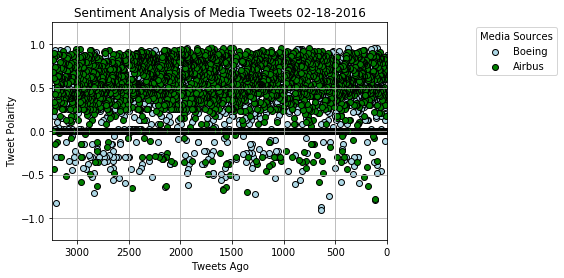

In [11]:
Boeing = twitter_data[(twitter_data.User == "@Boeing")]
Airbus = twitter_data[(twitter_data.User == "@Airbus")]


plt.scatter(Boeing["Tweet_Ago"], Boeing["Compound"], label = "Boeing", marker="o", c=["lightblue"], edgecolors="black")
plt.scatter(Airbus["Tweet_Ago"], Airbus["Compound"], label = "Airbus", marker="o", c=["green"], edgecolors="black")


# Plot field size
plt.xlim(-5, counter + 5)
plt.ylim(-1.25, 1.25)

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets" + " " + str(date_stamp))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)

plt.legend(title="Media Sources", bbox_to_anchor=(1.25, 1))

# Save the figure
plt.savefig("Sentiment Analysis of Media Tweets.png")

# invert x axis
ax = plt.gca()
ax.invert_xaxis()

# Show plot
plt.show()

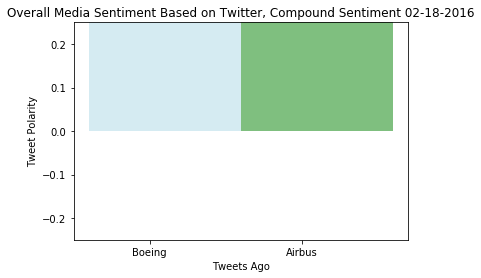

In [15]:
Boeing = twitter_data[(twitter_data.User == "@Boeing")]
Airbus = twitter_data[(twitter_data.User == "@Airbus")]


Boeing_average_compound = Boeing.mean()["Compound"]
Airbus_average_compound = Airbus.mean()["Compound"]

# Create an array that contains the number of users each language has
users = [Boeing_average_compound, Airbus_average_compound]
x_axis = np.arange(len(users))

# Tell matplotlib that we will be making a bar chart
plt.bar(x_axis, users, width=1, color=["lightblue", "green"], alpha=0.5, align="edge")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["Boeing", "Airbus"])

# Plot field size
plt.ylim(-.25, .25)

# Incorporate the other graph properties
plt.title("Overall Media Sentiment Based on Twitter, Compound Sentiment" + " " + str(date_stamp))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(False)

# # Save the figure
plt.savefig("Overall Media Sentiment Based on Twitter, Compound Sentiment.png")

# Show plot
plt.show()

In [58]:
march = data[(data['Date'] > '2017-01-01') & (data['Date'] < '2019-03-31' )]
march.head(10)

,Unnamed: 0,Date,User,Compound,Positive,Neutral,Negative,Tweet,Tweet_Ago,Open,High,Low,Close,Adj Close,Volume
2269,2269,2017-01-06,@Boeing,0.0000,0.000,1.000,0.0,RELEASE: #Boeing reports fourth-quarter delive...,779,158.979996,159.660004,157.889999,159.100006,151.046234,2426000.0
2270,2270,2017-01-23,@Boeing,0.0000,0.000,1.000,0.0,RT @BoeingDefense: T-minus 48 hours #Starliner...,701,158.940002,159.500000,157.289993,157.839996,149.849991,3931200.0
2271,2271,2017-01-24,@Boeing,0.0000,0.000,1.000,0.0,RT @BoeingDefense: T-minus 24 hours #Starliner...,700,158.580002,160.929993,157.839996,160.550003,152.422821,3927500.0
2272,2272,2017-01-25,@Boeing,0.4926,0.144,0.856,0.0,RT @BoeingDefense: Thanks for joining us! See ...,691,163.589996,168.649994,163.240005,167.360001,158.888092,7480000.0
2273,2273,2017-01-25,@Boeing,0.3818,0.224,0.776,0.0,Muilenburg: Positioning #Boeing for continued ...,692,163.589996,168.649994,163.240005,167.360001,158.888092,7480000.0
2274,2274,2017-01-25,@Boeing,0.3182,0.099,0.901,0.0,CFO Smith: 2017 operating cash flow expected t...,693,163.589996,168.649994,163.240005,167.360001,158.888092,7480000.0
2275,2275,2017-01-25,@Boeing,0.6486,0.249,0.751,0.0,Muilenburg: #Boeing Global Services to support...,694,163.589996,168.649994,163.240005,167.360001,158.888092,7480000.0
2276,2276,2017-01-25,@Boeing,0.0000,0.000,1.000,0.0,CEO Muilenburg: Key milestones in 2016 – first...,695,163.589996,168.649994,163.240005,167.360001,158.888092,7480000.0
2277,2277,2017-01-25,@Boeing,0.5994,0.290,0.710,0.0,"Muilenburg: #Boeing generated strong revenue, ...",696,163.589996,168.649994,163.240005,167.360001,158.888092,7480000.0
2278,2278,2017-01-25,@Boeing,0.0000,0.000,1.000,0.0,#Boeing CEO Dennis Muilenburg presents 2016 ea...,697,163.589996,168.649994,163.240005,167.360001,158.888092,7480000.0


Text(0.5, 1.0, 'Dates from Jan, 01, 2017 - MAr, 31, 2019 ')

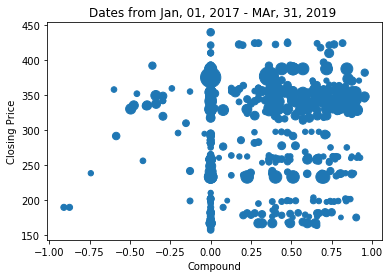

In [56]:
x = march['Compound']
y= march["Close"]
s=march["Volume"]
plt.scatter(x, y, s/90000)
plt.xlabel("Compound")
plt.ylabel("Closing Price")
plt.title("Dates from Jan, 01, 2017 - MAr, 31, 2019 ")

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [59]:
data = pd.read_csv('merge.csv')
data.head(10)

,Unnamed: 0,Date,User,Compound,Positive,Neutral,Negative,Tweet,Tweet_Ago,Open,High,Low,Close,Adj Close,Volume
0,0,2011-12-29,@Boeing,0.4939,0.262,0.738,0.000,RT @BoeingDefense: #Boeing Statement on Saudi ...,3229,73.440002,74.360001,73.309998,74.110001,61.619488,2749300.0
1,1,2011-12-30,@Boeing,0.6486,0.218,0.782,0.000,RT @BoeingDefense: The #Boeing & @NorthropGrum...,3228,73.860001,74.080002,73.239998,73.349998,60.987591,2811800.0
2,2,2012-01-03,@Boeing,0.0000,0.000,1.000,0.000,RT @BoeingAirplanes: Guess who made @EsquireMa...,3226,74.699997,75.000000,74.120003,74.220001,61.710960,6859300.0
3,3,2012-01-03,@Boeing,0.3182,0.141,0.859,0.000,@sarathbluebird Please follow us on this accou...,3227,74.699997,75.000000,74.120003,74.220001,61.710960,6859300.0
4,4,2012-01-04,@Boeing,0.0000,0.000,1.000,0.000,RT @boeingdefense: #Boeing placing #Wichita mo...,3222,74.099998,74.599998,73.589996,74.330002,61.802383,4923000.0
5,5,2012-01-04,@Boeing,0.0000,0.000,1.000,0.000,RT @boeingdefense: #Boeing doing everything po...,3223,74.099998,74.599998,73.589996,74.330002,61.802383,4923000.0
6,6,2012-01-04,@Boeing,0.1779,0.141,0.757,0.103,"RT @boeingdefense: Programs ending, limited op...",3224,74.099998,74.599998,73.589996,74.330002,61.802383,4923000.0
7,7,2012-01-04,@Boeing,0.0000,0.000,1.000,0.000,RT @boeingdefense: #Boeing to close #Wichita f...,3225,74.099998,74.599998,73.589996,74.330002,61.802383,4923000.0
8,8,2012-01-05,@Boeing,0.7073,0.245,0.755,0.000,RT @boeingairplanes: Check out this great phot...,3218,73.769997,73.900002,72.739998,73.529999,61.137230,6797900.0
9,9,2012-01-05,@Boeing,0.0000,0.000,1.000,0.000,Our 2011 commercial and defense/space deliveri...,3219,73.769997,73.900002,72.739998,73.529999,61.137230,6797900.0


In [21]:
X = data[["Compound", "Positive", "Neutral", "Negative" ]]
# X = data[["Open", "High", "Low", "Close","Compound", "Positive", "Neutral", "Negative"]]
# X = data[["Open", "High", "Low", "Close","Compound", "Positive", "Neutral", "Negative"]]
# X = data[[ "Close"]]

# .values.reshape(-1, 1)
y = data[["Open", "High", "Low", "Close"]]
# .values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (2910, 4) (2910, 4)


In [22]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [23]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [24]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [25]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

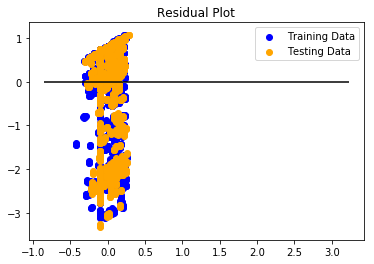

In [26]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [27]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.046883858411623, R2: 0.011040767701820706


In [28]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0482577228646606, R2: 0.00974291988055464


In [29]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.047217247047532, R2: 0.010725825631813108


In [30]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0482659839395447, R2: 0.009735115895222812


In [60]:

march = test3[(test3['Date'] > '2015-01-01') & (test3['Date'] < '2019-03-31 09:00:00')]
march.head(10)

,Date,User,Compound,Positive,Neutral,Negative,Tweet,Tweet_Ago,Open,High,Low,Close,Adj Close,Volume
1760,2015-01-06,@Boeing,0.0000,0.000,1.000,0.000,#Boeing reports fourth-quarter deliveries http...,1319,129.050003,129.619995,126.180000,127.529999,113.340225,4992800.0
1761,2015-01-08,@Boeing,-0.1779,0.117,0.736,0.147,"We are saddened by the passing of Bill Boeing,...",1318,130.600006,131.990005,130.399994,131.800003,117.135147,4503400.0
1762,2015-01-15,@Boeing,0.2960,0.136,0.864,0.000,RT @BoeingDefense: Video: Learn how #Boeing is...,1316,130.380005,131.830002,129.699997,130.139999,115.659859,3902000.0
1763,2015-01-15,@Boeing,0.1260,0.097,0.830,0.073,RT @airandspace: See the Spirit of St. Louis u...,1317,130.380005,131.830002,129.699997,130.139999,115.659859,3902000.0
1764,2015-01-16,@Boeing,0.8519,0.368,0.632,0.000,MT Honored to support @wwiimuseum: @Boeing hel...,1314,129.750000,131.020004,129.110001,130.779999,116.228638,4425600.0
1765,2015-01-16,@Boeing,0.1511,0.121,0.783,0.096,RT @BoeingDefense: Video: The #ISS is a lab li...,1315,129.750000,131.020004,129.110001,130.779999,116.228638,4425600.0
1766,2015-01-28,@Boeing,0.0000,0.000,1.000,0.000,RT @boeingdefense: @usairforce Identifies #Boe...,1309,136.300003,141.889999,135.919998,139.639999,124.102829,14355100.0
1767,2015-01-28,@Boeing,0.0000,0.000,1.000,0.000,"McNerney: Efforts of employees, partners and c...",1310,136.300003,141.889999,135.919998,139.639999,124.102829,14355100.0
1768,2015-01-28,@Boeing,0.6705,0.234,0.766,0.000,"McNerney: #Boeing is entering 2015 stronger, h...",1311,136.300003,141.889999,135.919998,139.639999,124.102829,14355100.0
1769,2015-01-28,@Boeing,0.5106,0.202,0.798,0.000,McNerney: Strong operating performance in 2014...,1312,136.300003,141.889999,135.919998,139.639999,124.102829,14355100.0


Text(0, 0.5, 'Closing Price')

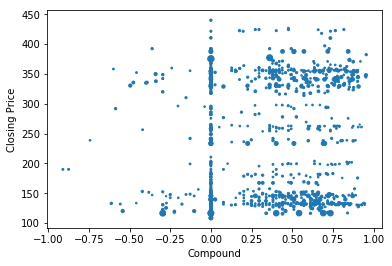

In [36]:
x = march['Compound']
y= march["Close"]
s=march["Volume"]
plt.scatter(x, y, s/900000)
plt.xlabel("Compound")
plt.ylabel("Closing Price")

In [37]:
X = data[[ 'Unnamed: 0' , 'Compound']]
y = data["Close"].values.reshape(-1, 1)
print(X.shape, y.shape)

(2910, 2) (2910, 1)


In [39]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [41]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [42]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

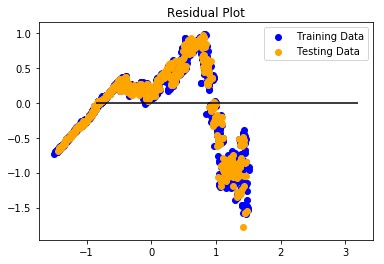

In [43]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [44]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.28623933467065915, R2: 0.7296045682689761


In [45]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
# accuracy of prediction
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2860072327017764, R2: 0.7298238229432293


In [50]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
# Ridge Regression is a remedial measure taken to alleviate multicollinearity 
# amongst regression predictor variables in a model. Often predictor variables 
# used in a regression are highly correlated
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2862395248715642, R2: 0.7296043885960606


In [47]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
# the elastic net is a regularized regression method that linearly combines 
# the L1 and L2 penalties of the lasso and ridge meth
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.28634213468519587, R2: 0.7295074584348419
